In [16]:
from langchain.llms import ollama
from ollama import generate
import glob
import pandas as pd
from PIL import Image
import os
from io import BytesIO

# Load the DataFrame from a CSV file, or create a new one if the file doesn't exist
def load_or_create_dataframe(filename):
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
    else:
        df = pd.DataFrame(columns=['image_file', 'description'])
    return df

df = load_or_create_dataframe('image_descriptions.csv')

def get_png_files(folder_path):
    return glob.glob(f"{folder_path}/*.png")

# get the list of image files in the folder yopu want to process
image_files = get_png_files("/Users/rishintiwari/Desktop/Spring 2024/Data Science Programming/Final Project/sample") 
image_files.sort()

print(image_files[:3])
print(df.head())

# processing the images 
def process_image(image_file):
    print(f"\nProcessing {image_file}\n")
    with Image.open(image_file) as img:
        with BytesIO() as buffer:
            img.save(buffer, format='PNG')
            image_bytes = buffer.getvalue()

    full_response = ''
    # Generate a description of the image
    for response in generate(model='llava', 
                             prompt= "Predict which soccer event is depicted in this image: Corner_Kick, Free_Kick, Penalty_kick, Red_Card, Yellow_Card, substitute, or tackle.",
                             images=[image_bytes], 
                             stream=True):
        # Print the response to the console and add it to the full response
        print(response['response'], end='', flush=True)
        full_response += response['response']

    # Add a new row to the DataFrame
    df.loc[len(df)] = [image_file, full_response]


for image_file in image_files:
    if image_file not in df['image_file'].values:
        process_image(image_file)

# Save the DataFrame to a CSV file
df.to_csv('image_descriptions.csv', index=False)

['/Users/rishintiwari/Desktop/Spring 2024/Data Science Programming/Final Project/sample/Image_100.png', '/Users/rishintiwari/Desktop/Spring 2024/Data Science Programming/Final Project/sample/demo1.png', '/Users/rishintiwari/Desktop/Spring 2024/Data Science Programming/Final Project/sample/demo2.png']
Empty DataFrame
Columns: [image_file, description]
Index: []

Processing /Users/rishintiwari/Desktop/Spring 2024/Data Science Programming/Final Project/sample/Image_100.png

 The image shows a soccer player in the act of kicking the ball, which is likely to be from a corner kick or a free kick. Corner kicks and free kicks are common types of set-piece situations in soccer where one team restarts play from a corner of the field after a throw-in. This is evident by the player's position on the pitch near the sideline, which indicates that this is taking place at or near a corner flag. The player is focused on striking the ball with power and precision, aiming to score a goal or create an opp

Recommended soccer event images:


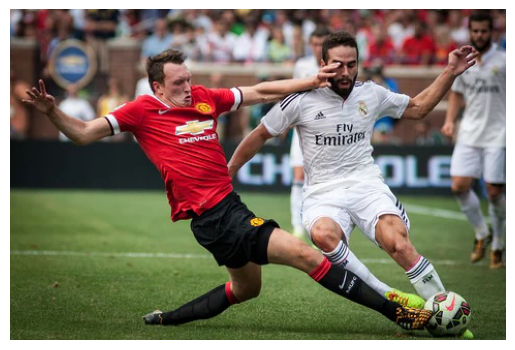

In [19]:
import pandas as pd
from langchain.llms import ollama
from ollama import generate
import matplotlib.pyplot as plt
from PIL import Image

# Load the DataFrame containing image descriptions
df = pd.read_csv('image_descriptions.csv')

# Define a function to recommend soccer event images to the user
def recommend_soccer_images(user_interests, num_images=5):
    recommended_images = []
    for index, row in df.iterrows():
        for interest in user_interests:
            if interest.lower() in row['description'].lower():
                recommended_images.append(row['image_file'])
                break  # Move to the next image if one of the user's interests is found
        if len(recommended_images) >= num_images:
            break  # Stop recommending images once the desired number is reached
    return recommended_images

# Example: User is interested in offense
user_interests = ['Manchester United']

# Recommend soccer event images based on user interests
recommended_images = recommend_soccer_images(user_interests)

# Display the recommended images
print("Recommended soccer event images:")
for image_file in recommended_images:
    img = Image.open(image_file)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
